# Which k for my kNN?

<br>

<figure>
<img src="https://i.ibb.co/4g5h7m6/visualize-1255x420.png" alt="visualize-1255x420" border="0" width="90%">
  <figcaption style="text-align: center; color: #777; font-weight: bold">Binary classification with kNN - <a href="https://blog.eduonix.com/artificial-intelligence/everything-need-know-k-nearest-neighbors-algorithm/">blog.eduonix.com</a></figcaption>
</figure>

### Introduction

In this exercice we are going to find the **most accurate** **k** for a **kNN classifier**.<br>
We are still trying to differenciate **pro** from **amateur** basket-ball players.

**Dataset:** "../data/Basket_Ball_Players.csv"<br>

**Columns:** <br>
**"Height"**, range [150, 220], height in centimeter <br>
**"3-Pointers"**, range [0, 30], 3-Pointers done in one minutes <br>
**"Pro-Player"**, range [0,1] <br>

### Exercise questions:

1. What is the **error rate** with **k=1**?
2. Which **k** give us the best **accuracy**?
3. What is the **accuracy** of the **best k**?
4. With the best **k**, is Paul classified as a **Pro-Player**?

## 1/ Data exploration

We are **re-using** the same **dataset** as the last exercise, so we just need to **import our libraries** and the **dataset**.

In [1]:
# The usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import Basket_Ball_Players.csv dataset
df = pd.read_csv("../data/Basket_Ball_Players.csv")
df.head()

,Height,3-Pointers,Pro-Player
0,187,24,1
1,210,15,0
2,184,15,0
3,208,19,1
4,175,15,0


## 2/ Mesure the error rate of multiple kNN

In order to find the best k value for our kNN we need to train multiple model with different k values.<br>
For each model we will take a note of the accuracy. That way we can compare the model and select the best one.<br>
The metrics we want to use here is the **error rate**, which is the sum of the errors.

So, let's follow these steps:
1. **Split** the data with a **trainning** and **test** dataset. [[ DOC ] - scikit-learn.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. **Iterate** through k in range [1,50]<br>
    a. train your model with k<br>
    b. compute the error rate<br>
    c. append the new error rate to the array with the error rates<br>

In [3]:
# Split the data with a trainning and test dataset
#   Please use `test_size=0.33, random_state=42` as parameter of your train_test_split()
#   That way we all have the same results
from sklearn.model_selection import train_test_split

X = df[['Height', '3-Pointers']]
y = df[['Pro-Player']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# 2. **Iterate** through k in range [1,50]
#    a. train your model with k
#    b. compute the error rate
#    c. append the new error rate to the array with the error rates

from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for k in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train.values.flatten())
    y_predic = neigh.predict(X_test)
    error_rate = sum(y_predic != y_test.values.flatten())
    error_rates.append(error_rate)
    
len(error_rates)

50

## 3/ Finding the best K with the elbow method

To do that we can:
1. **Plot** the **error rate** for each k
2. **Select** the best candidates with the elbow method

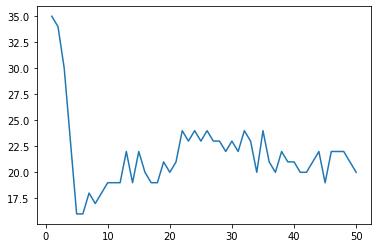

In [5]:
plt.plot(range(1,51), error_rates)

### What is the error rate with k=1 ?

In [10]:
question_k1_error_rate = 35 # enter the error rate for k=1

### Which k give us the best accuracy?

In [7]:
question_best_k = 5 # enter best k you found

### What is the mean accuracy of the best k?

In [8]:
question_best_k_accuracy = None # enter the mean accuracy of the best k

### With the best k, is Paul classified as a Pro-Player?

In [9]:
question_paul_is_pro_2 = None # enter True or False